/tmp/ipykernel_2617019/958949740.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{y:.1%}' for y in yticks])
/tmp/ipykernel_2617019/958949740.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{y:.1%}' for y in yticks])


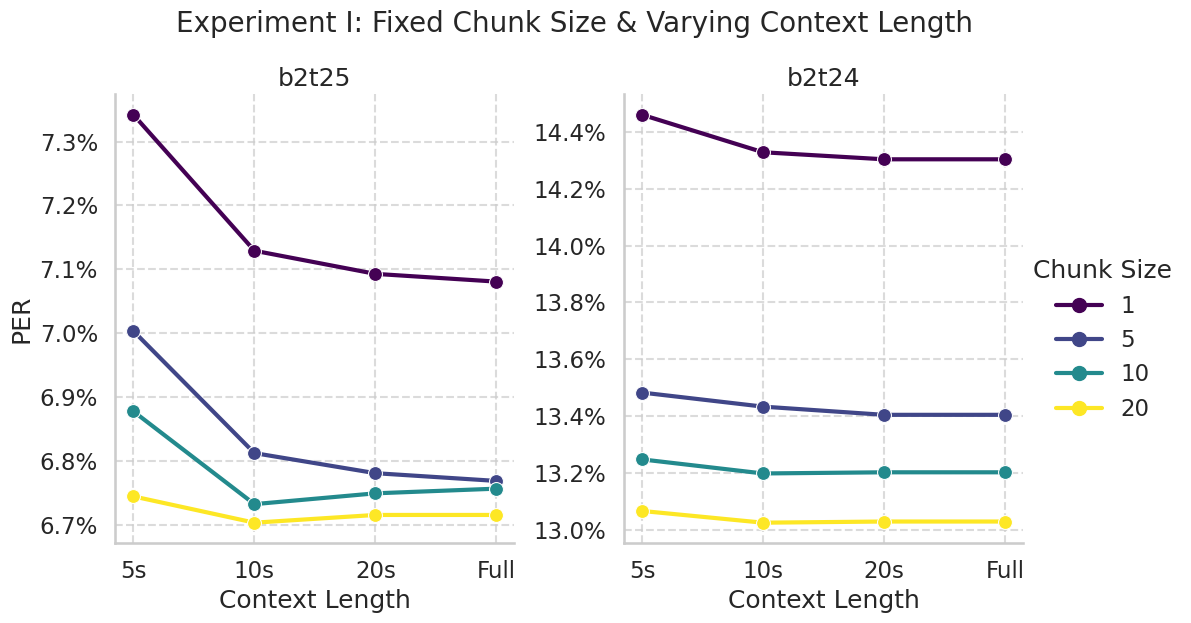

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Structure the Data
# I've transcribed the values directly from your image.
data = {
    'Chunk Size': [
        # b2t25 Data
        1, 1, 1, 1,
        5, 5, 5, 5,
        10, 10, 10, 10,
        20, 20, 20, 20,
        # b2t24 Data
        1, 1, 1, 1,
        5, 5, 5, 5,
        10, 10, 10, 10,
        20, 20, 20, 20,
    ],
    'Context Length': [
        # b2t25
        "5s", "10s", "20s", "Full",
        "5s", "10s", "20s", "Full",
        "5s", "10s", "20s", "Full",
        "5s", "10s", "20s", "Full",
        # b2t24
        "5s", "10s", "20s", "Full",
        "5s", "10s", "20s", "Full",
        "5s", "10s", "20s", "Full",
        "5s", "10s", "20s", "Full",
    ],
    'Dataset': [
        # b2t25 labels
        *['b2t25 (Val)']*16,
        # b2t24 labels
        *['b2t24 (Val)']*16
    ],
    'PER': [
        # b2t25 Values
        0.073419, 0.071293, 0.070931, 0.070810, # Chunk 1
        0.070037, 0.068129, 0.067815, 0.067694, # Chunk 5
        0.068781, 0.067331, 0.067500, 0.067573, # Chunk 10
        0.067452, 0.067041, 0.067162, 0.067162, # Chunk 20
        
        # b2t24 Values
        0.144608, 0.143287, 0.143039, 0.143039, # Chunk 1
        0.134827, 0.134332, 0.134043, 0.134043, # Chunk 5
        0.132474, 0.131979, 0.132020, 0.132020, # Chunk 10
        0.130659, 0.130246, 0.130287, 0.130287, # Chunk 20
    ]
}

df = pd.DataFrame(data)

# 2. Setup Seaborn Styling
sns.set_theme(style="whitegrid", context="talk") # 'talk' makes fonts slightly larger for presentations

# 3. Create the Plot
# relplot allows us to create subplots (facets) easily
g = sns.relplot(
    data=df,
    x="Context Length", 
    y="PER", 
    hue="Chunk Size",      # Color lines by Chunk Size
    col="Dataset",         # Split into two plots by Dataset
    kind="line",           # Line plot
    marker="o",            # Add dots to data points
    palette="viridis",     # High contrast palette
    height=6, 
    aspect=0.9,
    linewidth=3,
    markersize=10,
    facet_kws={'sharey': False} # VERY IMPORTANT: Let Y-axes be independent so we can see trends
)

# 4. Refine Axes and Titles
# Adjust Y-axis labels to be percentages
for ax in g.axes.flat:
    # Get current y-ticks
    yticks = ax.get_yticks()
    # Format them as percentages (e.g., 0.14 -> 14.0%)
    ax.set_yticklabels([f'{y:.1%}' for y in yticks])
    
    # Add minor gridlines for easier reading
    ax.grid(True, which='both', linestyle='--', alpha=0.7)

# Set specific titles for the panels
g.axes[0,0].set_title("b2t25")
g.axes[0,1].set_title("b2t24")

# Fix the Legend Title
g._legend.set_title("Chunk Size")
# Move legend slightly if needed, or leave as default
sns.move_legend(g, "center right", bbox_to_anchor=(1, 0.5))

# Global Title
g.figure.suptitle('Experiment I: Fixed Chunk Size & Varying Context Length', fontsize=20, y=1.05)

plt.show()

/tmp/ipykernel_2617019/1585339506.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{y:.1%}' for y in yticks])
/tmp/ipykernel_2617019/1585339506.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{y:.1%}' for y in yticks])


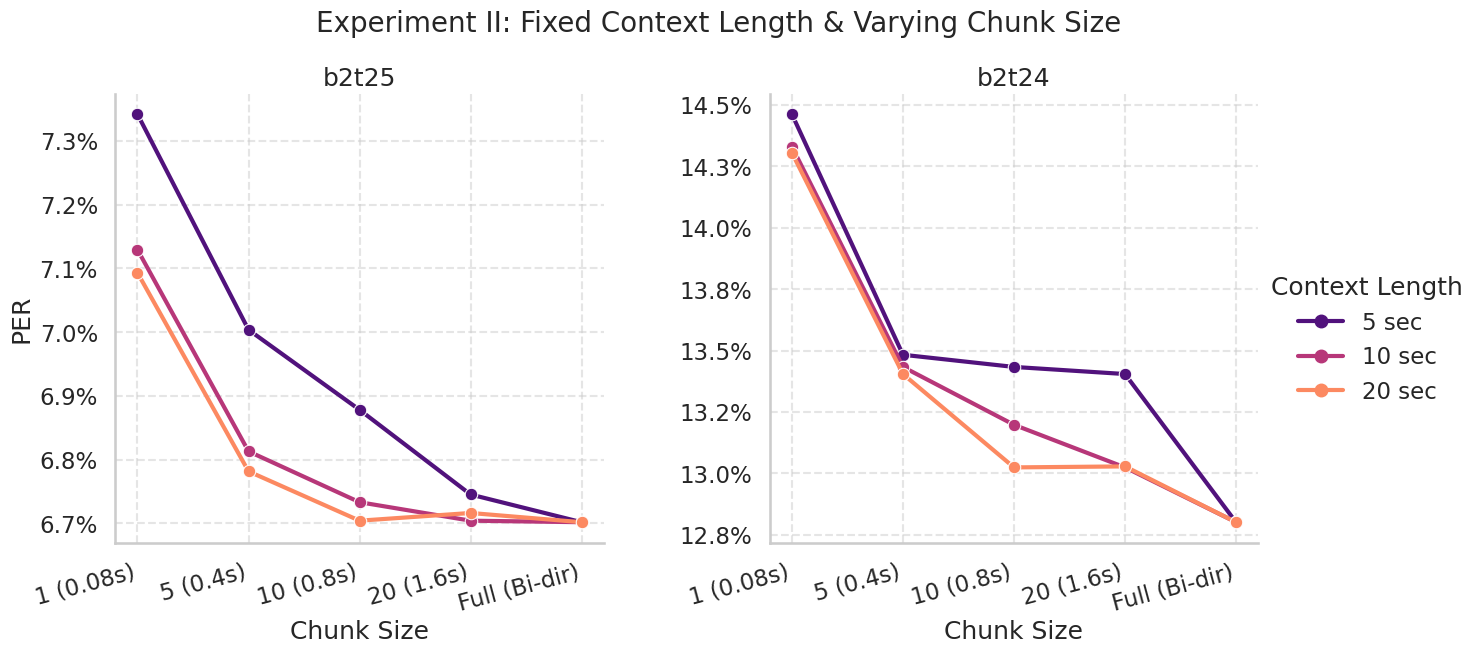

In [6]:
# 1. Structure the Data from Experiment II Image
data = {
    'Context Length': [
        # Context: 5 sec (repeated for b2t25 and b2t24)
        "5 sec", "5 sec", "5 sec", "5 sec", "5 sec",
        "5 sec", "5 sec", "5 sec", "5 sec", "5 sec",
        # Context: 10 sec
        "10 sec", "10 sec", "10 sec", "10 sec", "10 sec",
        "10 sec", "10 sec", "10 sec", "10 sec", "10 sec",
        # Context: 20 sec
        "20 sec", "20 sec", "20 sec", "20 sec", "20 sec",
        "20 sec", "20 sec", "20 sec", "20 sec", "20 sec",
    ],
    'Chunk Size': [
        # Sequence for 5 sec
        "1 (0.08s)", "5 (0.4s)", "10 (0.8s)", "20 (1.6s)", "Full (Bi-dir)",
        "1 (0.08s)", "5 (0.4s)", "10 (0.8s)", "20 (1.6s)", "Full (Bi-dir)",
        # Sequence for 10 sec
        "1 (0.08s)", "5 (0.4s)", "10 (0.8s)", "20 (1.6s)", "Full (Bi-dir)",
        "1 (0.08s)", "5 (0.4s)", "10 (0.8s)", "20 (1.6s)", "Full (Bi-dir)",
        # Sequence for 20 sec
        "1 (0.08s)", "5 (0.4s)", "10 (0.8s)", "20 (1.6s)", "Full (Bi-dir)",
        "1 (0.08s)", "5 (0.4s)", "10 (0.8s)", "20 (1.6s)", "Full (Bi-dir)",
    ],
    'Dataset': [
        # 5 sec block
        *['b2t25 (Val)']*5, *['b2t24 (Val)']*5,
        # 10 sec block
        *['b2t25 (Val)']*5, *['b2t24 (Val)']*5,
        # 20 sec block
        *['b2t25 (Val)']*5, *['b2t24 (Val)']*5,
    ],
    'PER': [
        # --- Context: 5 sec ---
        # b2t25
        0.073419, 0.070037, 0.068781, 0.067452, 0.067017,
        # b2t24
        0.144608, 0.134827, 0.134332, 0.134043, 0.128017,

        # --- Context: 10 sec ---
        # b2t25
        0.071293, 0.068129, 0.067331, 0.067041, 0.067017,
        # b2t24
        0.143287, 0.134332, 0.131979, 0.130246, 0.128017,

        # --- Context: 20 sec ---
        # b2t25
        0.070931, 0.067815, 0.067041, 0.067162, 0.067017,
        # b2t24
        0.143039, 0.134043, 0.130246, 0.130287, 0.128017,
    ]
}

df = pd.DataFrame(data)

# 2. Setup Styling
sns.set_theme(style="whitegrid", context="talk")

# 3. Create the Plot
# We swap roles: X is now Chunk Size, Hue is Context Length
g = sns.relplot(
    data=df,
    x="Chunk Size", 
    y="PER", 
    hue="Context Length",   # Different lines for different contexts
    col="Dataset",          # Facet by Dataset
    kind="line",
    marker="o",
    palette="magma",        # Different palette to distinguish from Exp I
    height=6, 
    aspect=1.1,
    linewidth=3,
    markersize=9,
    facet_kws={'sharey': False}
)

# 4. Refine Axes and Formatting
for ax in g.axes.flat:
    # Format Y-axis as percentages
    yticks = ax.get_yticks()
    ax.set_yticklabels([f'{y:.1%}' for y in yticks])
    
    # Add minor gridlines
    ax.grid(True, which='both', linestyle='--', alpha=0.5)
    
    # Rotate X-axis labels slightly if they overlap, though aspect=1.1 should fit them
    for label in ax.get_xticklabels():
        label.set_rotation(15)
        label.set_ha('right')

# Titles
g.axes[0,0].set_title("b2t25")
g.axes[0,1].set_title("b2t24")

# Legend and Global Title
g._legend.set_title("Context Length")
sns.move_legend(g, "center right", bbox_to_anchor=(1, 0.5))
g.figure.suptitle('Experiment II: Fixed Context Length & Varying Chunk Size', fontsize=20, y=1.05)

plt.show()